In [1]:
#Import_libraries
import numpy as np
import tensorflow as tf
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input ,Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = (224, 224)
batch_size = 5

In [3]:
# Load the pre-trained VGG16 model without the top (classification) layer
resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

In [4]:
# Freeze the weights of the pre-trained layers
for layer in resnet.layers:
    layer.trainable = False

In [5]:
x = Flatten()(resnet.output)

In [6]:
prediction = Dense(5 , activation='softmax')(x)

In [7]:
model = Model(inputs=resnet.input , outputs=prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,089,477 (91.89 MB)

 Trainable params: 501,765 (1.91 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [8]:
# Training Image preprocessing
train_datagen  = ImageDataGenerator(    
rescale=1./255, 
shear_range=0.2, 
zoom_range=0.2,                                                  
horizontal_flip=True,)   
training_set = train_datagen.flow_from_directory(
'train',target_size=IMAGE_SIZE,batch_size=batch_size,class_mode='categorical')

# validation Image preprocessing
val_datagen = ImageDataGenerator(
rescale=1./255)
val_set = val_datagen.flow_from_directory(
'val',target_size=IMAGE_SIZE,batch_size=batch_size,class_mode='categorical')


# test Image preprocessing
test_datagen = ImageDataGenerator(
rescale=1./255)
test_set = test_datagen.flow_from_directory(
'test',target_size=IMAGE_SIZE,batch_size=batch_size,class_mode='categorical')

Found 1000 images belonging to 5 classes.
Found 125 images belonging to 5 classes.
Found 125 images belonging to 5 classes.


In [9]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
history = model.fit(x=training_set,validation_data=val_set,epochs=40) 

Epoch 1/40


C:\Users\Revotec\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.3043 - loss: 1.6508 - val_accuracy: 0.5840 - val_loss: 1.2348
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 195s 961ms/step - accuracy: 0.4843 - loss: 1.2475 - val_accuracy: 0.5600 - val_loss: 1.0796
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 196s 966ms/step - accuracy: 0.4773 - loss: 1.1626 - val_accuracy: 0.6240 - val_loss: 0.9376
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.5603 - loss: 1.1017 - val_accuracy: 0.6320 - val_loss: 0.9945
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.5374 - loss: 1.1360 - val_accuracy: 0.4880 - val_loss: 1.2350
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 200s 987ms/step - accuracy: 0.5272 - loss: 1.1752 - val_accuracy: 0.6560 - val_loss: 1.0930
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 199s 980ms/step - accuracy: 0.5819 - loss: 1.0134 - val_accuracy: 0.6800 - val_loss: 0.7703
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 200s 983ms/step - accuracy: 0.6507 - loss: 0.9258 - val_

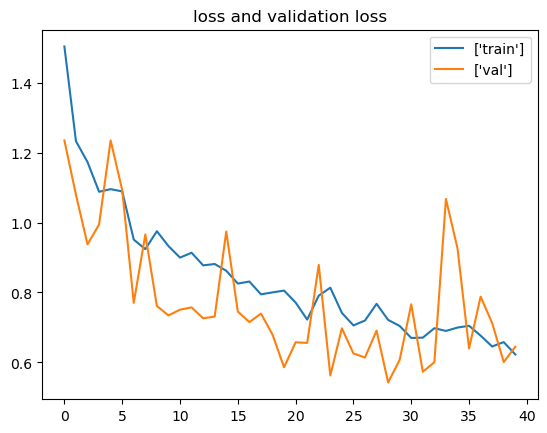

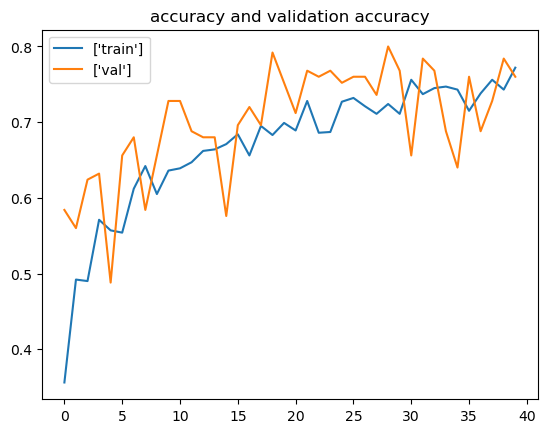

In [11]:
plt.plot(history.history['loss'], label=['train']) #loss de train
plt.plot(history.history['val_loss'], label=['val']) # loss de test
plt.title('loss and validation loss') # title
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label=['train']) #loss de train
plt.plot(history.history['val_accuracy'], label=['val']) # loss de test
plt.title('accuracy and validation accuracy') # title
plt.legend()
plt.show()

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 470ms/step - accuracy: 0.7380 - loss: 0.4609
Test accuracy: 0.7680000066757202


In [13]:
model.save('DATASET1_ResNet_CNN.h5')